---
# GRPN Take-Home Assignment V2
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, explained_variance_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_excel('GRPN_data.xlsx', sheet_name='Q4 2013 Raw Data', index_col=0)
df = df.drop(columns=['Unnamed: 6'])
df = df.reset_index().set_index('Start Date').sort_index()

In [4]:
df.head()

,Deal ID,Units Sold,Gross Billings,Deal URL,Segment
Start Date,,,,,
2011-11-21,gr-millevois-tire-service-center,0.0,0.0,http://www.groupon.com/deals/gr-millevois-tire...,Local
2011-11-21,gr-manakeesh-cafe-bakery,0.0,0.0,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local
2011-11-21,gr-phoenix-salon-and-spa,0.0,0.0,http://www.groupon.com/deals/gr-phoenix-salon-...,Local
2011-11-21,gr-hands-in-motion,0.0,0.0,http://www.groupon.com/deals/gr-hands-in-motion,Local
2012-06-06,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,http://www.groupon.com/deals/dc-fd2-bartending...,Local


In [5]:
df.tail(10)

,Deal ID,Units Sold,Gross Billings,Deal URL,Segment
Start Date,,,,,
2013-12-31,ga-bk-holiday-inn-express-times-square,13.050,1291.95000,http://www.groupon.com/deals/ga-bk-holiday-inn...,Travel
2013-12-31,the-original-pancake-house-6,216.100,2905.00000,http://www.groupon.com/deals/the-original-panc...,Local
2013-12-31,the-original-pancake-house-5,111.600,1488.00000,http://www.groupon.com/deals/the-original-panc...,Local
2013-12-31,ga-bk-the-commons-hotel,4.350,413.25000,http://www.groupon.com/deals/ga-bk-the-commons...,Travel
2013-12-31,excel-with-business-187-us-boise,2.900,200.10000,http://www.groupon.com/deals/excel-with-busine...,Local
2013-12-31,hollywood-fitness,0.000,0.00000,http://www.groupon.com/deals/hollywood-fitness,Local
2013-12-31,luxe-beauty-lounge-mobile-spa-2,5.800,469.80000,http://www.groupon.com/deals/luxe-beauty-loung...,Local
2013-12-31,dream-weaver-salon-day-spa-1,30.800,2218.00000,http://www.groupon.com/deals/dream-weaver-salo...,Local
2013-12-31,ga-vista-sol-buenos-aires-design,0.000,0.00000,http://www.groupon.com/deals/ga-vista-sol-buen...,Travel


In [6]:
df.shape

(138534, 5)

- Looks like we got all the rows from the raw data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138534 entries, 2011-11-21 to 2013-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Deal ID         138534 non-null  object 
 1   Units Sold      138534 non-null  float64
 2   Gross Billings  138534 non-null  float64
 3   Deal URL        138534 non-null  object 
 4   Segment         138534 non-null  object 
dtypes: float64(2), object(3)
memory usage: 6.3+ MB


- Don't see any nulls in any columns

In [8]:
df.isna().sum()

Deal ID           0
Units Sold        0
Gross Billings    0
Deal URL          0
Segment           0
dtype: int64

In [9]:
df.describe()

,Units Sold,Gross Billings
count,138534.000000,1.385340e+05
mean,178.462592,5.500602e+03
std,864.551565,2.774653e+04
min,-9100.000000,-2.180629e+05
25%,1.450000,6.380000e+01
50%,19.200000,8.502000e+02
75%,99.200000,3.677450e+03
max,62500.000000,2.874885e+06


In [10]:
# take a look at date range for data
df.index.min(), df.index.max()

(Timestamp('2011-11-21 00:00:00'), Timestamp('2013-12-31 00:00:00'))

In [12]:
df.resample('D').sum().head(10)

,Units Sold,Gross Billings
Start Date,,
2011-11-21,0.0,0.0
2011-11-22,0.0,0.0
2011-11-23,0.0,0.0
2011-11-24,0.0,0.0
2011-11-25,0.0,0.0
2011-11-26,0.0,0.0
2011-11-27,0.0,0.0
2011-11-28,0.0,0.0
2011-11-29,0.0,0.0


In [13]:
df.resample('D').sum().tail(10)

,Units Sold,Gross Billings
Start Date,,
2013-12-22,123535.164,3.683928e+06
2013-12-23,187513.496,6.410913e+06
2013-12-24,66734.150,1.727414e+06
2013-12-25,70529.836,1.798346e+06
2013-12-26,217267.764,5.891075e+06
2013-12-27,135330.742,3.548567e+06
2013-12-28,106305.084,2.837010e+06
2013-12-29,52808.318,1.397689e+06
2013-12-30,46946.726,1.192412e+06


In [14]:
df['Gross Billings'].head(20)

Start Date
2011-11-21       0.00
2011-11-21       0.00
2011-11-21       0.00
2011-11-21       0.00
2012-06-06    4253.20
2012-06-26     763.00
2012-06-26    8556.50
2012-07-01       0.00
2012-07-07       0.00
2012-07-21     261.60
2012-07-29     469.80
2012-07-31    1580.50
2012-08-01       0.00
2012-08-01     390.05
2012-08-04     534.10
2012-08-04     246.70
2012-08-04    1652.10
2012-08-08       0.00
2012-08-12     392.00
2012-08-14     392.40
Name: Gross Billings, dtype: float64

In [15]:
# lets upsample the data to make sure that we have an observation for each day (even if it is a null value)
# we will likely eventually want to do this for each segment, but I will see what happens for all data first (will likely be less accurate?)
# resample to daily first (looks like this is all that we actually need to do, this method inserts a row for each day and fills those with no values with a 0)
df['Gross Billings'].resample('D').sum().head(20)

Start Date
2011-11-21    0.0
2011-11-22    0.0
2011-11-23    0.0
2011-11-24    0.0
2011-11-25    0.0
2011-11-26    0.0
2011-11-27    0.0
2011-11-28    0.0
2011-11-29    0.0
2011-11-30    0.0
2011-12-01    0.0
2011-12-02    0.0
2011-12-03    0.0
2011-12-04    0.0
2011-12-05    0.0
2011-12-06    0.0
2011-12-07    0.0
2011-12-08    0.0
2011-12-09    0.0
2011-12-10    0.0
Freq: D, Name: Gross Billings, dtype: float64

<AxesSubplot:xlabel='Start Date'>

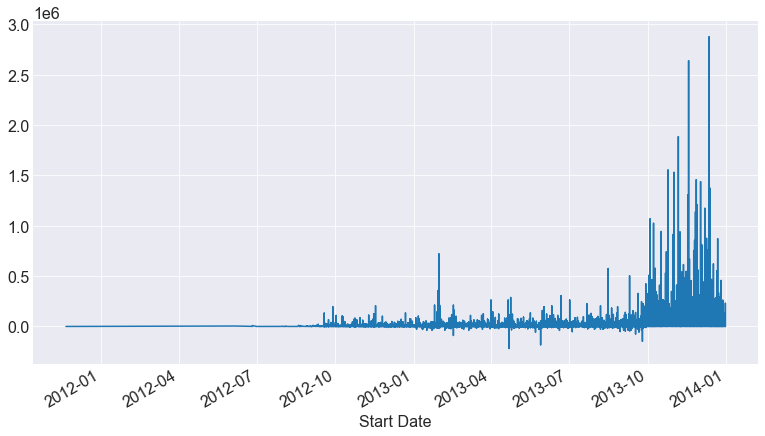

In [17]:
# lets take a look at all data in raw form
df['Gross Billings'].plot()

- Really don't have any data from 01/2021 to 10-2012
- Doesn't appear that any historical data present in this raw data will be useful in predicting missing data for quarter of interest
- Since the date is the start date, we need to use all data to calculate totals since all rows yielded billings in quarter of interest

- Data is not really useful in raw form since it is not very interpretable.
- Why?
    - There are many entries on each day and days in between with no entries at all?
        - Let's create a column for the day of the year, groupby that column and see totals
            - This will help me to see if we are missing a bunch of days
            - I don't think we are missing days, but the fact that there are multiple entries per day must be messing up the plot??

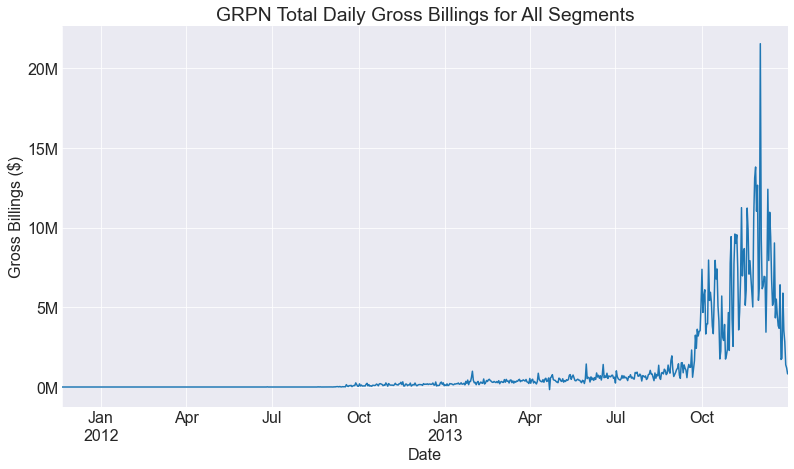

In [21]:
# resample by day and take the sum for all data
df['Gross Billings'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='GRPN Total Daily Gross Billings for All Segments', xlabel='Date', ylabel='Gross Billings ($)');

- I see the drop in gross billings around end of Oct 2013 (missing data?)

## Find Missing Data

In [23]:
# lets break down into each segment
df.Segment.value_counts()

Local     120576
Goods      15234
Travel      2724
Name: Segment, dtype: int64

In [24]:
local_df = df[df.Segment == 'Local']
goods_df = df[df.Segment == 'Goods']
travel_df = df[df.Segment == 'Travel']

In [25]:
local_df.head()

,Deal ID,Units Sold,Gross Billings,Deal URL,Segment
Start Date,,,,,
2011-11-21,gr-millevois-tire-service-center,0.0,0.0,http://www.groupon.com/deals/gr-millevois-tire...,Local
2011-11-21,gr-manakeesh-cafe-bakery,0.0,0.0,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local
2011-11-21,gr-phoenix-salon-and-spa,0.0,0.0,http://www.groupon.com/deals/gr-phoenix-salon-...,Local
2011-11-21,gr-hands-in-motion,0.0,0.0,http://www.groupon.com/deals/gr-hands-in-motion,Local
2012-06-06,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,http://www.groupon.com/deals/dc-fd2-bartending...,Local


### Local

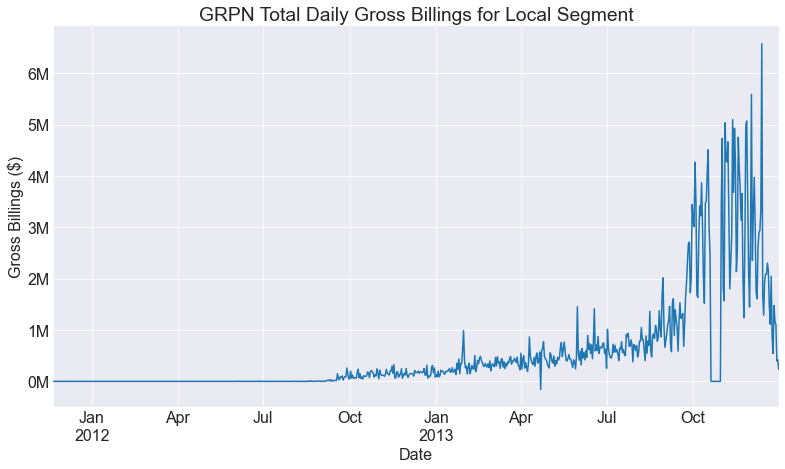

In [26]:
local_df['Gross Billings'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='GRPN Total Daily Gross Billings for Local Segment', xlabel='Date', ylabel='Gross Billings ($)');

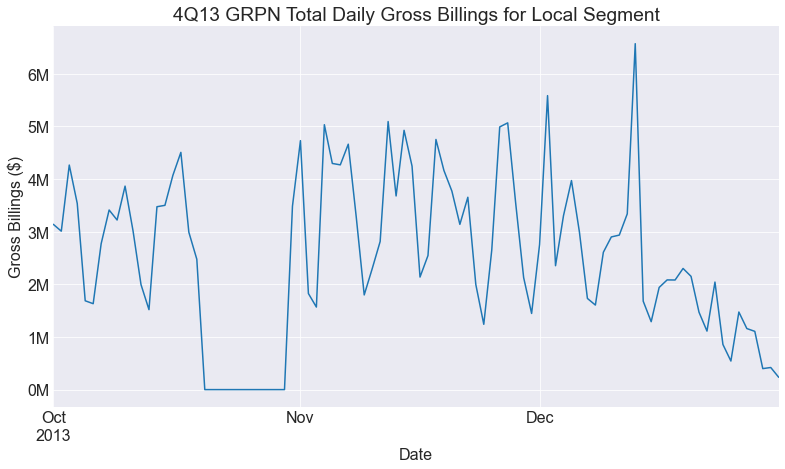

In [27]:
local_df['Gross Billings']['2013-10' : '2013-12'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='4Q13 GRPN Total Daily Gross Billings for Local Segment', xlabel='Date', ylabel='Gross Billings ($)');

- Looks like we are missing some data here toward the end of October
- We have some data going back to Oct 2012 but doesn't look representative of what we are seeing for 2013 (couldn't really be used to predict?)
- Need to figure out a way to fill the missing values here
    - forward fill?
    - back fill?
    - Might be able to use some seasonality and previous trends here to impute the missing data

In [28]:
local_df['Gross Billings'].resample('D').sum().sum()

409222657.98199993

In [29]:
sum_w_missing = local_df['Gross Billings'].resample('D').sum().sum()

In [31]:
local_df['Gross Billings'].sum()

409222657.982

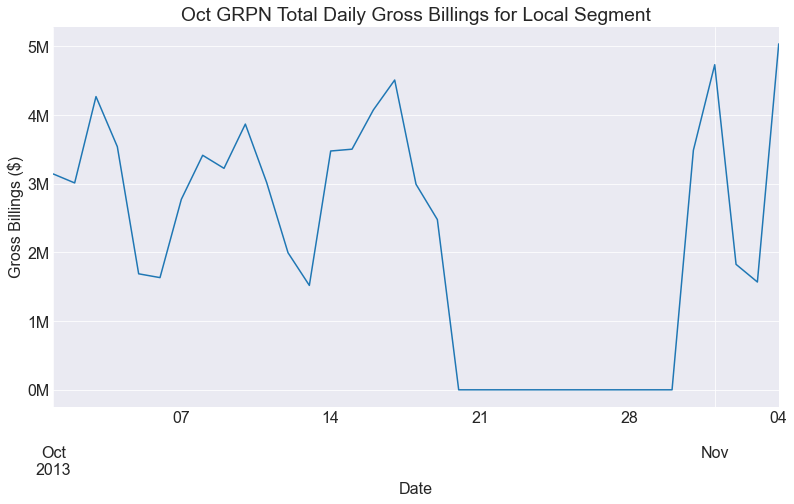

In [32]:
# take a closer look at where we have missing data
local_df['Gross Billings']['2013-10' : '2013-11-4'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='Oct GRPN Total Daily Gross Billings for Local Segment', xlabel='Date', ylabel='Gross Billings ($)');

In [33]:
# save this to a df for future work
oct_nov_df = local_df['Gross Billings']['2013-10' : '2013-11-4'].resample('D').sum()

In [34]:
# take a closer look at where we have missing data
oct_nov_df

Start Date
2013-10-01    3.140574e+06
2013-10-02    3.010398e+06
2013-10-03    4.266867e+06
2013-10-04    3.538083e+06
2013-10-05    1.687881e+06
2013-10-06    1.632563e+06
2013-10-07    2.771953e+06
2013-10-08    3.412731e+06
2013-10-09    3.222805e+06
2013-10-10    3.866735e+06
2013-10-11    3.015991e+06
2013-10-12    1.994842e+06
2013-10-13    1.519141e+06
2013-10-14    3.475041e+06
2013-10-15    3.501416e+06
2013-10-16    4.072212e+06
2013-10-17    4.507996e+06
2013-10-18    2.991175e+06
2013-10-19    2.477089e+06
2013-10-20    0.000000e+00
2013-10-21    0.000000e+00
2013-10-22    0.000000e+00
2013-10-23    0.000000e+00
2013-10-24    0.000000e+00
2013-10-25    0.000000e+00
2013-10-26    0.000000e+00
2013-10-27    0.000000e+00
2013-10-28    0.000000e+00
2013-10-29    0.000000e+00
2013-10-30    0.000000e+00
2013-10-31    3.485813e+06
2013-11-01    4.730800e+06
2013-11-02    1.825585e+06
2013-11-03    1.568658e+06
2013-11-04    5.033931e+06
Freq: D, Name: Gross Billings, dtype: float6

- We are missing data for 10-20 through 10-30
    - 11 days
- Take diff(7).mean for previous week and add to the previous week to predict the next week
    - cadence seems to be weekly in this case
- 6 to 12 will be first 'training set'
    - Full week 13 to 19 diff(7).mean() + train
    - Use this to predict 20 to 26
- Use 20 to 26 to predict 4 remaining missing days (27 to 30)
- cycles
    - 6 - 12
    - 13 - 19
    - 20 - 26 (all missing)
    - 27 - 2 (27 to 30 missing)

In [35]:
# need to grab the past two cycles for my training set
train1 = oct_nov_df['2013-10-6' : '2013-10-19']
train1

Start Date
2013-10-06    1.632563e+06
2013-10-07    2.771953e+06
2013-10-08    3.412731e+06
2013-10-09    3.222805e+06
2013-10-10    3.866735e+06
2013-10-11    3.015991e+06
2013-10-12    1.994842e+06
2013-10-13    1.519141e+06
2013-10-14    3.475041e+06
2013-10-15    3.501416e+06
2013-10-16    4.072212e+06
2013-10-17    4.507996e+06
2013-10-18    2.991175e+06
2013-10-19    2.477089e+06
Freq: D, Name: Gross Billings, dtype: float64

In [36]:
missing1 = oct_nov_df['2013-10-20' : '2013-10-26']
missing1

Start Date
2013-10-20    0.0
2013-10-21    0.0
2013-10-22    0.0
2013-10-23    0.0
2013-10-24    0.0
2013-10-25    0.0
2013-10-26    0.0
Freq: D, Name: Gross Billings, dtype: float64

In [37]:
pred1 = train1['2013-10-13' : '2013-10-19'] + train1.diff(7).mean()
pred1.index = missing1.index
pred1

Start Date
2013-10-20    1.894348e+06
2013-10-21    3.850248e+06
2013-10-22    3.876623e+06
2013-10-23    4.447419e+06
2013-10-24    4.883203e+06
2013-10-25    3.366382e+06
2013-10-26    2.852296e+06
Freq: D, Name: Gross Billings, dtype: float64

In [38]:
train1.diff(7).mean()

375207.0093571433

<AxesSubplot:xlabel='Start Date'>

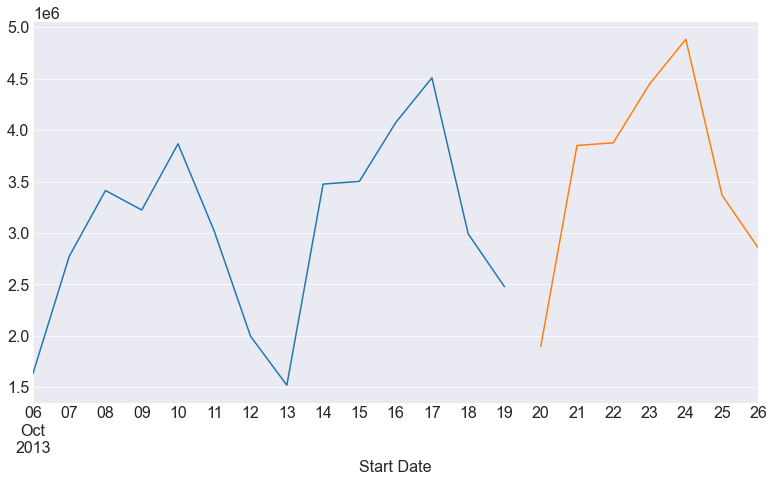

In [39]:
train1.plot()
pred1.plot()

In [40]:
# predict the final missing 4 days
# training set here will be 13 to 26
# will have to concat
# week1 will be 13 to 19
week1 = oct_nov_df['2013-10-13' : '2013-10-19']
# week2 will be 10 to 26
week2 = pred1

In [41]:
train2 = pd.concat([week1, week2])
train2

Start Date
2013-10-13    1.519141e+06
2013-10-14    3.475041e+06
2013-10-15    3.501416e+06
2013-10-16    4.072212e+06
2013-10-17    4.507996e+06
2013-10-18    2.991175e+06
2013-10-19    2.477089e+06
2013-10-20    1.894348e+06
2013-10-21    3.850248e+06
2013-10-22    3.876623e+06
2013-10-23    4.447419e+06
2013-10-24    4.883203e+06
2013-10-25    3.366382e+06
2013-10-26    2.852296e+06
Freq: D, Name: Gross Billings, dtype: float64

In [42]:
missing2 = oct_nov_df['2013-10-27' : '2013-10-30']
missing2

Start Date
2013-10-27    0.0
2013-10-28    0.0
2013-10-29    0.0
2013-10-30    0.0
Freq: D, Name: Gross Billings, dtype: float64

In [43]:
# should be the same since the difference was used to make this calculation before
train2.diff(7).mean()

375207.0093571433

In [44]:
pred2 = train2['2013-10-20' : '2013-10-23'] + train1.diff(7).mean()
pred2.index = missing2.index
pred2

Start Date
2013-10-27    2.269555e+06
2013-10-28    4.225455e+06
2013-10-29    4.251830e+06
2013-10-30    4.822626e+06
Freq: D, Name: Gross Billings, dtype: float64

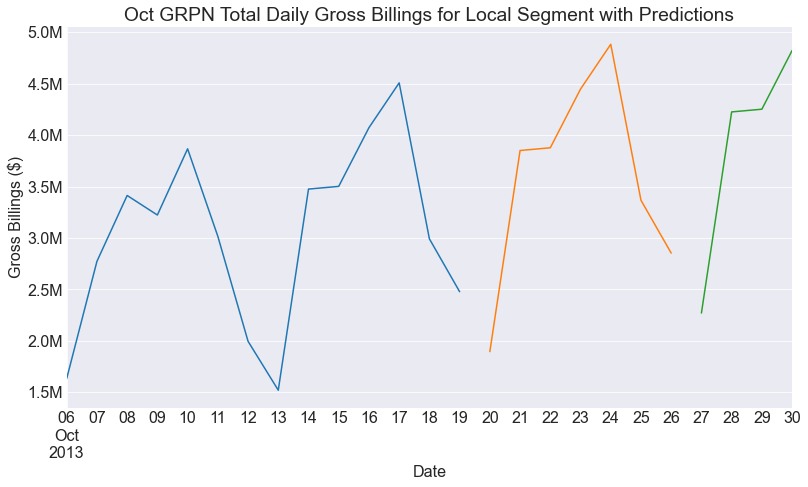

In [45]:
train1.plot()
pred1.plot()
# train2.plot()
pred2.plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.1f}M'.format(x / 1_000_000))
plt.gca().set(title='Oct GRPN Total Daily Gross Billings for Local Segment with Predictions', xlabel='Date', ylabel='Gross Billings ($)');

In [46]:
# concat it all together to see what predictions look like plotted
part1 = oct_nov_df[:'2013-10-19']

In [47]:
part2 = oct_nov_df['2013-10-31':]

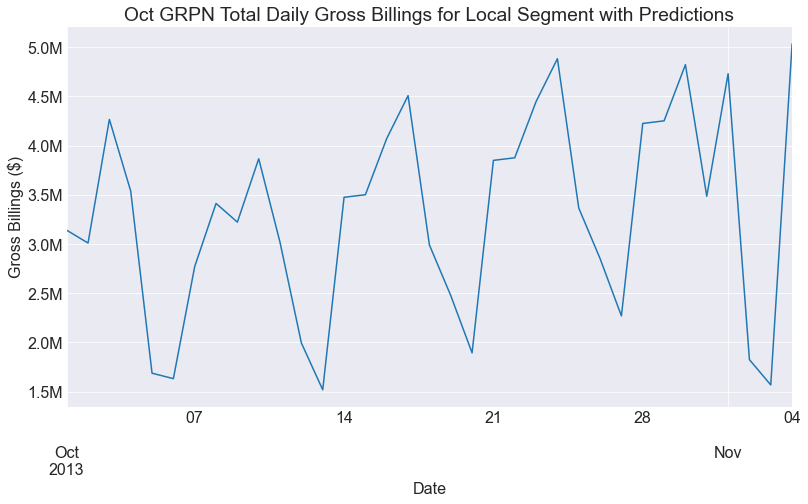

In [48]:
oct_w_preds = pd.concat([part1, pred1, pred2, part2])
oct_w_preds.plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.1f}M'.format(x / 1_000_000))
plt.gca().set(title='Oct GRPN Total Daily Gross Billings for Local Segment with Predictions', xlabel='Date', ylabel='Gross Billings ($)');

In [49]:
oct_nov_df

Start Date
2013-10-01    3.140574e+06
2013-10-02    3.010398e+06
2013-10-03    4.266867e+06
2013-10-04    3.538083e+06
2013-10-05    1.687881e+06
2013-10-06    1.632563e+06
2013-10-07    2.771953e+06
2013-10-08    3.412731e+06
2013-10-09    3.222805e+06
2013-10-10    3.866735e+06
2013-10-11    3.015991e+06
2013-10-12    1.994842e+06
2013-10-13    1.519141e+06
2013-10-14    3.475041e+06
2013-10-15    3.501416e+06
2013-10-16    4.072212e+06
2013-10-17    4.507996e+06
2013-10-18    2.991175e+06
2013-10-19    2.477089e+06
2013-10-20    0.000000e+00
2013-10-21    0.000000e+00
2013-10-22    0.000000e+00
2013-10-23    0.000000e+00
2013-10-24    0.000000e+00
2013-10-25    0.000000e+00
2013-10-26    0.000000e+00
2013-10-27    0.000000e+00
2013-10-28    0.000000e+00
2013-10-29    0.000000e+00
2013-10-30    0.000000e+00
2013-10-31    3.485813e+06
2013-11-01    4.730800e+06
2013-11-02    1.825585e+06
2013-11-03    1.568658e+06
2013-11-04    5.033931e+06
Freq: D, Name: Gross Billings, dtype: float6

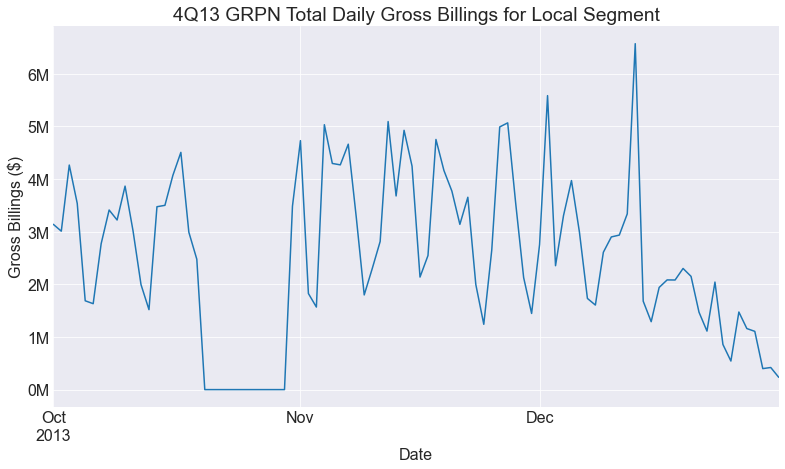

In [50]:
local_q4 = local_df['Gross Billings']['2013-10' : '2013-12'].resample('D').sum()
local_q4.plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='4Q13 GRPN Total Daily Gross Billings for Local Segment', xlabel='Date', ylabel='Gross Billings ($)');

In [51]:
p1 = local_q4[: '2013-10-19']

In [52]:
p2 = local_q4['2013-10-31' :]

In [53]:
# combine all preds to take sum
preds = pd.concat([pred1, pred2])
preds.sum()

40739984.35335714

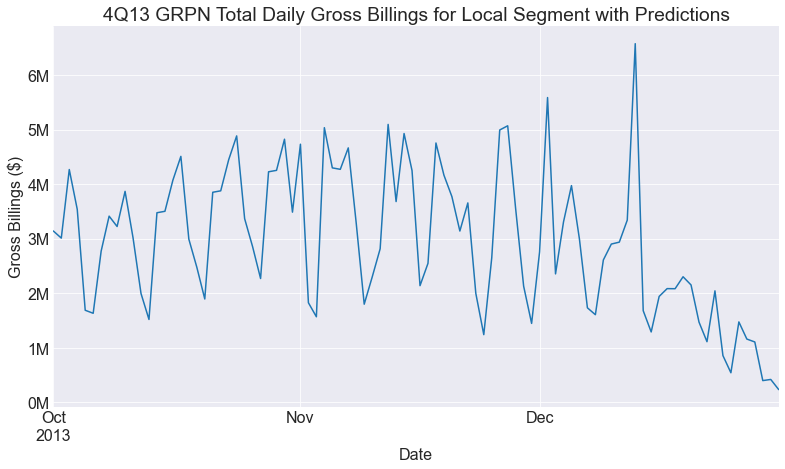

In [54]:
# lets take a look at whole quarter with preds added
local_q4_w_preds = pd.concat([p1, preds, p2])
local_q4_w_preds.plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='4Q13 GRPN Total Daily Gross Billings for Local Segment with Predictions', xlabel='Date', ylabel='Gross Billings ($)');

In [55]:
local_q4_w_preds['2013-10'].sum()

102331291.16235712

In [56]:
local_q4_w_preds['2013-11'].sum()

101766642.03849995

In [57]:
local_q4_w_preds['2013-12'].sum()

67018251.05949999

In [58]:
local_q4_w_preds.sum()

271116184.2603571

<AxesSubplot:xlabel='Start Date'>

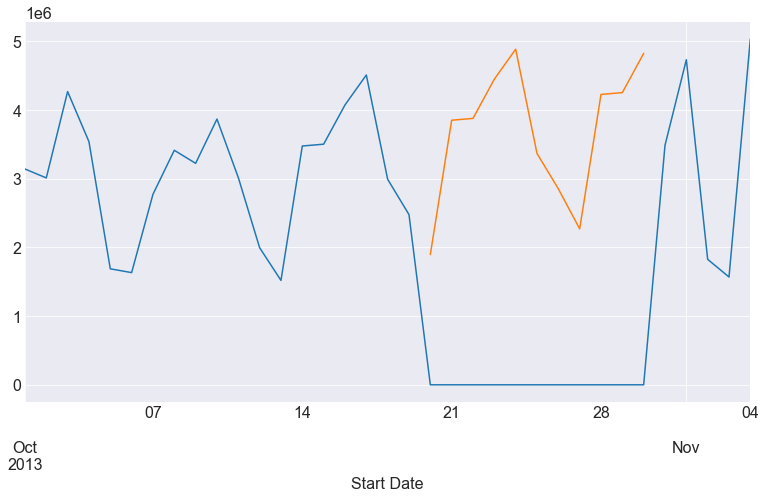

In [59]:
oct_nov_df.plot()
preds.plot()

In [60]:
preds_sum = preds.sum()

In [61]:
sum_w_missing + preds_sum

449962642.33535707

### Goods

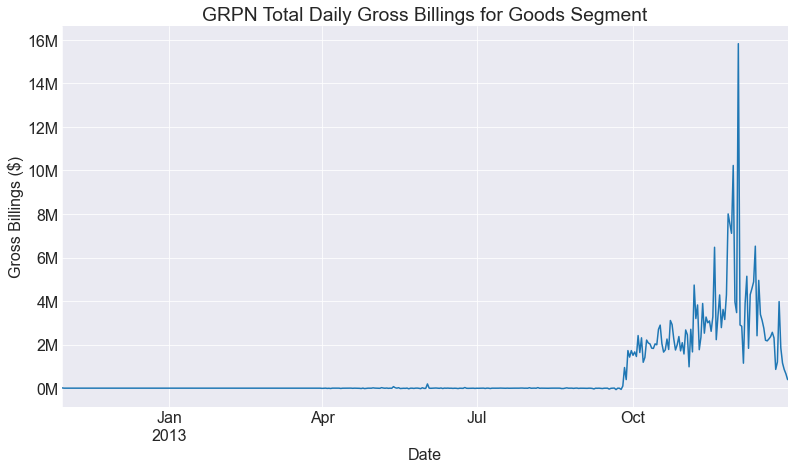

In [62]:
goods_df['Gross Billings'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='GRPN Total Daily Gross Billings for Goods Segment', xlabel='Date', ylabel='Gross Billings ($)');

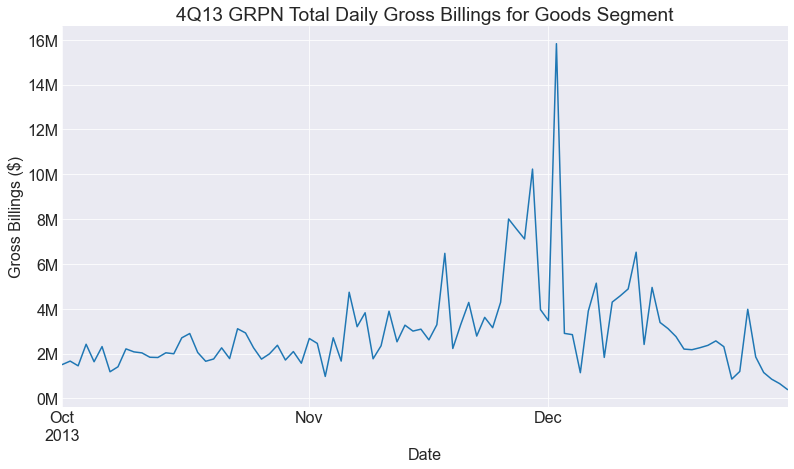

In [63]:
goods_df['Gross Billings']['2013-10' : '2013-12'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='4Q13 GRPN Total Daily Gross Billings for Goods Segment', xlabel='Date', ylabel='Gross Billings ($)');

In [65]:
goods_df['Gross Billings']['2013-10'].resample('D').sum().sum()

62470213.892600015

In [66]:
goods_df['Gross Billings']['2013-11'].resample('D').sum().sum()

115005646.40109998

In [67]:
goods_df['Gross Billings']['2013-12'].resample('D').sum().sum()

98789035.28974003

- Don't really have any data until Oct 2013
- No obvious areas of missing data
- Don't see any obvious trends to use to predict
    - Might not need to predict here if we aren't missing any data in this segment
- Just take the sum of all gross billings for this segment for the quarter of interest and see how that compares to consensus estimate

In [64]:
# Take the sum of all gross billings for quarter of interest and compare to consensus numbers
goods_df['Gross Billings'].resample('D').sum().sum()

282245671.04132

In [65]:
# get sum without resampling to confirm that it is the same
goods_df['Gross Billings'].sum()

282245671.04132

### Travel

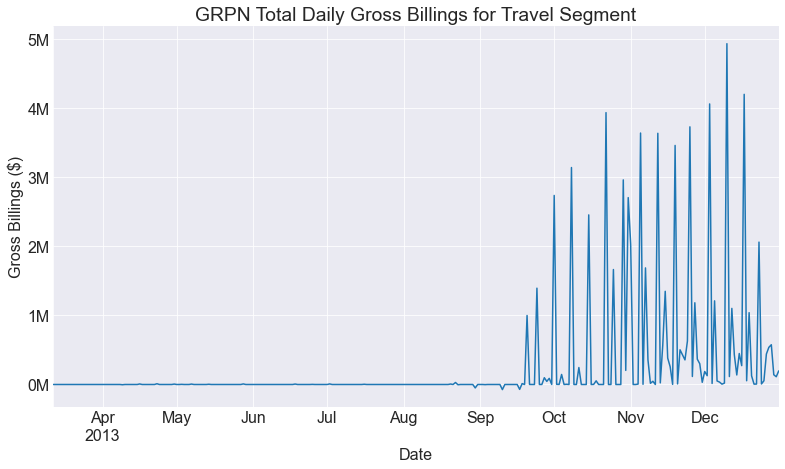

In [70]:
travel_df['Gross Billings'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='GRPN Total Daily Gross Billings for Travel Segment', xlabel='Date', ylabel='Gross Billings ($)');

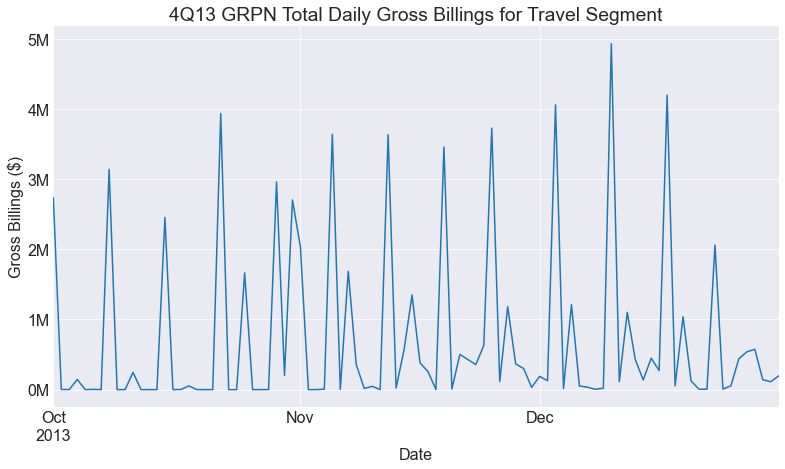

In [71]:
travel_df['Gross Billings']['2013-10' : '2013-12'].resample('D').sum().plot()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}M'.format(x / 1_000_000))
plt.gca().set(title='4Q13 GRPN Total Daily Gross Billings for Travel Segment', xlabel='Date', ylabel='Gross Billings ($)');

In [72]:
travel_df['Gross Billings']['2013-10'].resample('D').sum().sum()

20237033.510000005

In [73]:
travel_df['Gross Billings']['2013-11'].resample('D').sum().sum()

25095951.93

In [74]:
travel_df['Gross Billings']['2013-12'].resample('D').sum().sum()

22688555.826999992

- This data seems much less consistent
    - Makes sense that there would be less activity since these are likely larger purchases
- How can I tell if we have missing data?
    - Take sum of given data and see if we are close to the estimates provided

In [66]:
travel_df['Gross Billings'].resample('D').sum().sum()

70552062.1245

In [67]:
travel_df['Gross Billings'].sum()

70552062.1245